<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.500364,53.188797,63.085302,14.948804,220.723266,201.745597,18.977670
1,0.0,1.0,79.051814,51.992605,92.046508,-54.062241,179.028685,254.959010,-75.930325
2,0.0,2.0,75.614267,44.351676,69.048725,15.993785,215.008453,200.306654,14.701799
3,0.0,3.0,39.139711,24.760606,20.796648,65.041610,159.738575,56.979893,102.758682
4,0.0,4.0,67.770925,29.886048,26.534299,-71.954596,62.236675,97.646558,-35.409883
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,31.574137,65.166008,56.037866,-71.700888,91.077123,151.696156,-60.619033
19996,999.0,16.0,87.187198,22.096252,50.103625,-14.109949,155.277126,178.856518,-23.579392
19997,999.0,17.0,81.431232,21.881123,96.669426,-26.197645,183.784136,147.420163,36.363973
19998,999.0,18.0,76.272573,72.571537,85.672348,3.591887,248.108344,221.378550,26.729794


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    79.500364  53.188797  63.085302  14.948804  220.723266   
      1.0    79.051814  51.992605  92.046508 -54.062241  179.028685   
      2.0    75.614267  44.351676  69.048725  15.993785  215.008453   
      3.0    39.139711  24.760606  20.796648  65.041610  159.738575   
      4.0    67.770925  29.886048  26.534299 -71.954596   62.236675   
...                ...        ...        ...        ...         ...   
999.0 15.0   31.574137  65.166008  56.037866 -71.700888   91.077123   
      16.0   87.187198  22.096252  50.103625 -14.109949  155.277126   
      17.0   81.431232  21.881123  96.669426 -26.197645  183.784136   
      18.0   76.272573  72.571537  85.672348   3.591887  248.108344   
      19.0   51.382364  21.966299  52.315034  -3.783024  131.880673   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    201.745597   18.977670  
      1.0    254.959010  -75.930325  
      2.0    200.306654   14.701799  
      3.0     56.979893  102.758682  
      4.0     97.646558  -35.409883  
...                 ...         ...  
999.0 15.0   151.696156  -60.619033  
      16.0   178.856518  -23.579392  
      17.0   147.420163   36.363973  
      18.0   221.378550   26.729794  
      19.0   119.721019   12.159655  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    79.500364  53.188797  63.085302  14.948804  220.723266   
      1.0    79.051814  51.992605  92.046508 -54.062241  179.028685   
      2.0    75.614267  44.351676  69.048725  15.993785  215.008453   
      3.0    39.139711  24.760606  20.796648  65.041610  159.738575   
      4.0    67.770925  29.886048  26.534299 -71.954596   62.236675   
...                ...        ...        ...        ...         ...   
999.0 15.0   31.574137  65.166008  56.037866 -71.700888   91.077123   
      16.0   87.187198  22.096252  50.103625 -14.109949  155.277126   
      17.0   81.431232  21.881123  96.669426 -26.197645  183.784136   
      18.0   76.272573  72.571537  85.672348   3.591887  248.108344   
      19.0   51.382364  21.966299  52.315034  -3.783024  131.880673   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    201.745597   18.977670  
      1.0    254.959010  -75.930325  
      2.0    200.306654   14.701799  
      3.0     56.979893  102.758682  
      4.0     97.646558  -35.409883  
...                 ...         ...  
999.0 15.0   151.696156  -60.619033  
      16.0   178.856518  -23.579392  
      17.0   147.420163   36.363973  
      18.0   221.378550   26.729794  
      19.0   119.721019   12.159655  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.500364,53.188797,63.085302,14.948804,220.723266,201.745597,18.977670
1,0.0,1.0,79.051814,51.992605,92.046508,-54.062241,179.028685,254.959010,-75.930325
2,0.0,2.0,75.614267,44.351676,69.048725,15.993785,215.008453,200.306654,14.701799
3,0.0,3.0,39.139711,24.760606,20.796648,65.041610,159.738575,56.979893,102.758682
4,0.0,4.0,67.770925,29.886048,26.534299,-71.954596,62.236675,97.646558,-35.409883
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,31.574137,65.166008,56.037866,-71.700888,91.077123,151.696156,-60.619033
19996,999.0,16.0,87.187198,22.096252,50.103625,-14.109949,155.277126,178.856518,-23.579392
19997,999.0,17.0,81.431232,21.881123,96.669426,-26.197645,183.784136,147.420163,36.363973
19998,999.0,18.0,76.272573,72.571537,85.672348,3.591887,248.108344,221.378550,26.729794


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    79.500364  53.188797  63.085302  14.948804  220.723266   
      1.0    79.051814  51.992605  92.046508 -54.062241  179.028685   
      2.0    75.614267  44.351676  69.048725  15.993785  215.008453   
      3.0    39.139711  24.760606  20.796648  65.041610  159.738575   
      4.0    67.770925  29.886048  26.534299 -71.954596   62.236675   
...                ...        ...        ...        ...         ...   
999.0 15.0   31.574137  65.166008  56.037866 -71.700888   91.077123   
      16.0   87.187198  22.096252  50.103625 -14.109949  155.277126   
      17.0   81.431232  21.881123  96.669426 -26.197645  183.784136   
      18.0   76.272573  72.571537  85.672348   3.591887  248.108344   
      19.0   51.382364  21.966299  52.315034  -3.783024  131.880673   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    201.745597   18.977670  
      1.0    254.959010  -75.930325  
      2.0    200.306654   14.701799  
      3.0     56.979893  102.758682  
      4.0     97.646558  -35.409883  
...                 ...         ...  
999.0 15.0   151.696156  -60.619033  
      16.0   178.856518  -23.579392  
      17.0   147.420163   36.363973  
      18.0   221.378550   26.729794  
      19.0   119.721019   12.159655  

[20000 rows x 7 columns]

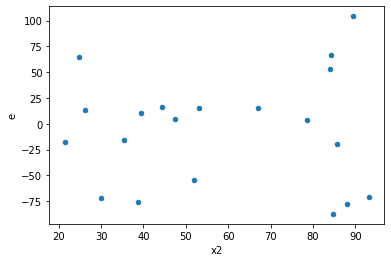

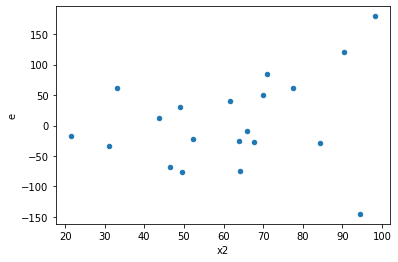

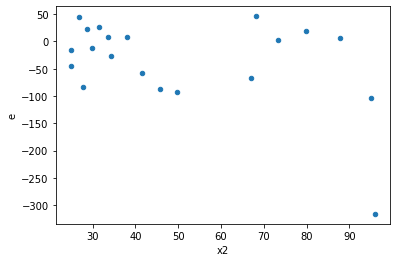

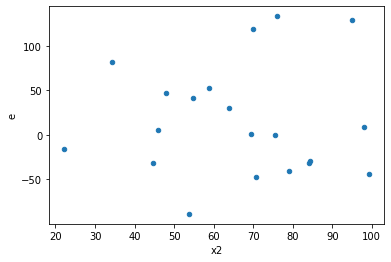

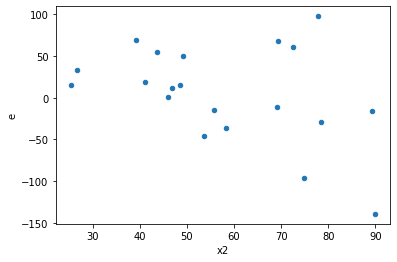

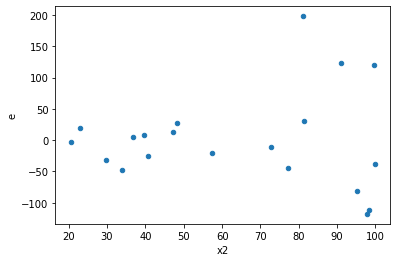

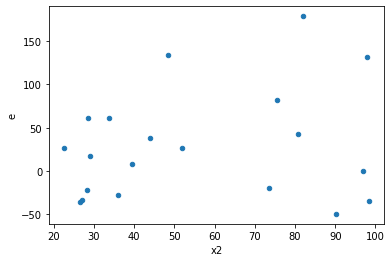

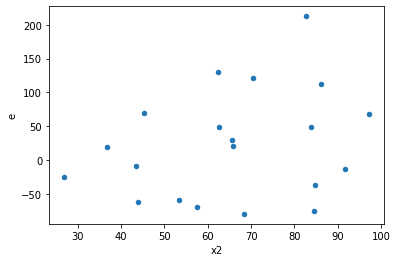

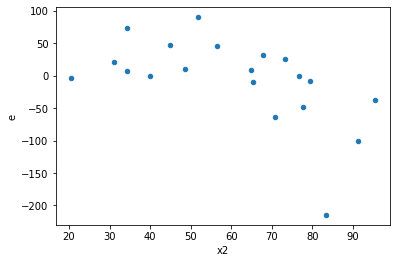

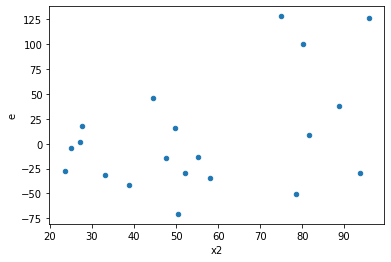

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,10.0,4.0,15764.769734289524,47771.5783546629,1576.4769734289525,11942.894588665726,7.575686032818518,0.06592055892152082,0.9670397205392396,0.03296027946076041,Reject001=1 : Homoscedasticity
3.0,8.0,6.0,33988.22063263956,27143.77747857495,4248.527579079945,4523.962913095825,1.064830774636404,0.9663254147755538,0.5168372926122231,0.4831627073877769,Reject001=1 : Homoscedasticity
4.0,10.0,4.0,12724.850230239444,31450.556608444338,1272.4850230239444,7862.6391521110845,6.178964003384685,0.09410879471171807,0.952945602644141,0.047054397355859034,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,17293.020735436134,38675.108498294365,2882.170122572689,4834.388562286796,1.6773432367592214,0.48719474893230474,0.7564026255338476,0.24359737446615237,Reject001=1 : Homoscedasticity
7.0,5.0,9.0,12507.499504747148,60496.17377923483,2501.4999009494295,6721.797086581648,2.687106677090185,0.18745686429505004,0.906271567852475,0.09372843214752502,Reject001=1 : Homoscedasticity
10.0,9.0,5.0,30104.43828936958,34442.63949189874,3344.937587707731,6888.527898379749,2.0593890671366526,0.4411759697826074,0.7794120151086963,0.2205879848913037,Reject001=1 : Homoscedasticity
11.0,6.0,8.0,6948.184248759791,48615.25131018723,1158.030708126632,6076.906413773404,5.247621130534725,0.035546620277061125,0.9822266898614694,0.017773310138530563,Reject001=1 : Homoscedasticity
12.0,6.0,8.0,14980.476447364039,48084.23922682862,2496.746074560673,6010.5299033535775,2.407345290173807,0.24909809861806842,0.8754509506909658,0.12454904930903421,Reject001=1 : Homoscedasticity
13.0,6.0,8.0,9470.751281975496,29440.972036159128,1578.4585469959159,3680.121504519891,2.331465410684246,0.26603407613366903,0.8669829619331655,0.13301703806683451,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,8.0,16794.240278142046,15864.897737658446,2799.0400463570077,1983.1122172073058,0.7084972649063581,0.6937037174638008,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,68719.44033042961,11254.98213146909,13743.888066085923,1250.5535701632323,0.09098979591146898,0.01674764206638892,Reject001=1 : Homoscedasticity
2.0,10.0,4.0,15764.769734289524,47771.5783546629,1576.4769734289525,11942.894588665726,7.575686032818518,0.06592055892152082,Reject001=1 : Homoscedasticity
3.0,8.0,6.0,33988.22063263956,27143.77747857495,4248.527579079945,4523.962913095825,1.064830774636404,0.9663254147755538,Reject001=1 : Homoscedasticity
4.0,10.0,4.0,12724.850230239444,31450.556608444338,1272.4850230239444,7862.6391521110845,6.178964003384685,0.09410879471171807,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,17293.020735436134,38675.108498294365,2882.170122572689,4834.388562286796,1.6773432367592214,0.48719474893230474,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,39229.166944647455,15773.59848128187,6538.194490774576,1971.6998101602337,0.30156640536501506,0.16143602196010093,Reject001=1 : Homoscedasticity
7.0,5.0,9.0,12507.499504747148,60496.17377923483,2501.4999009494295,6721.797086581648,2.687106677090185,0.18745686429505004,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,29143.93365628676,5311.917651104428,4163.419093755251,758.845378729204,0.18226495138752732,0.039013171127317225,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      860
Reject001=0 : Heteroscedasticity    140
Name: Result_test, dtype: int64